## Facebook Network Analysis

Load necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import community as community_louvain

### Introduction

Load the dataset named 'facebook_network.txt', which is a dataset about personal friends in Facebook. And take an overview.

In [3]:
facebook = pd.read_csv('facebook_network.txt', sep=' ', names=['start_node', 'end_node'],)

facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


Based on the dataset, construct a graph and get three main features: degree, clustering and closeness.

Here, we used three features: degree, clustering and closeness. 

Degree is the number of connections (edges) a node has in a network, indicating the level of connectivity of a node. Nodes with high degree are often considered more influential or important within the network. 

Clustering is a coefficient between 0 to 1, reflecting how many triangles can be formed in its neighbors with one vertix being this point. The formula is $C(v) = \frac{2 \times \text{number of triangles connected to } v}{\text{number of pairs of neighbors of } v}$. A high clustering coefficient indicates that if two nodes are connected to a common node, they are likely to be connected to each other as well.

Closeness is a measure of how quickly a node can reach other nodes in the network. Nodes with high closeness can reach others more quickly and taking important role in information distribution. The formula is $C_B(x)=\frac{1}{\sum_y d(y,x)}$.

In [4]:
from networkx import betweenness, closeness
# Create a graph from the dataframe
G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')
degree = np.array([G.degree(node) for node in G.nodes()])
clustering = np.array([nx.clustering(G, node) for node in G.nodes()])
closeness = np.array([nx.closeness_centrality(G, node) for node in G.nodes()])
# Stack the features in a single array
features = np.vstack((degree, clustering, closeness)).T

Compute the average degree for each node

In [5]:
G.number_of_nodes()
G.number_of_edges()
np.mean([d for n, d in G.degree()])

np.float64(43.69101262688784)

#### Visualization

Use draw_networkx() function with random_layout to visualize graph G

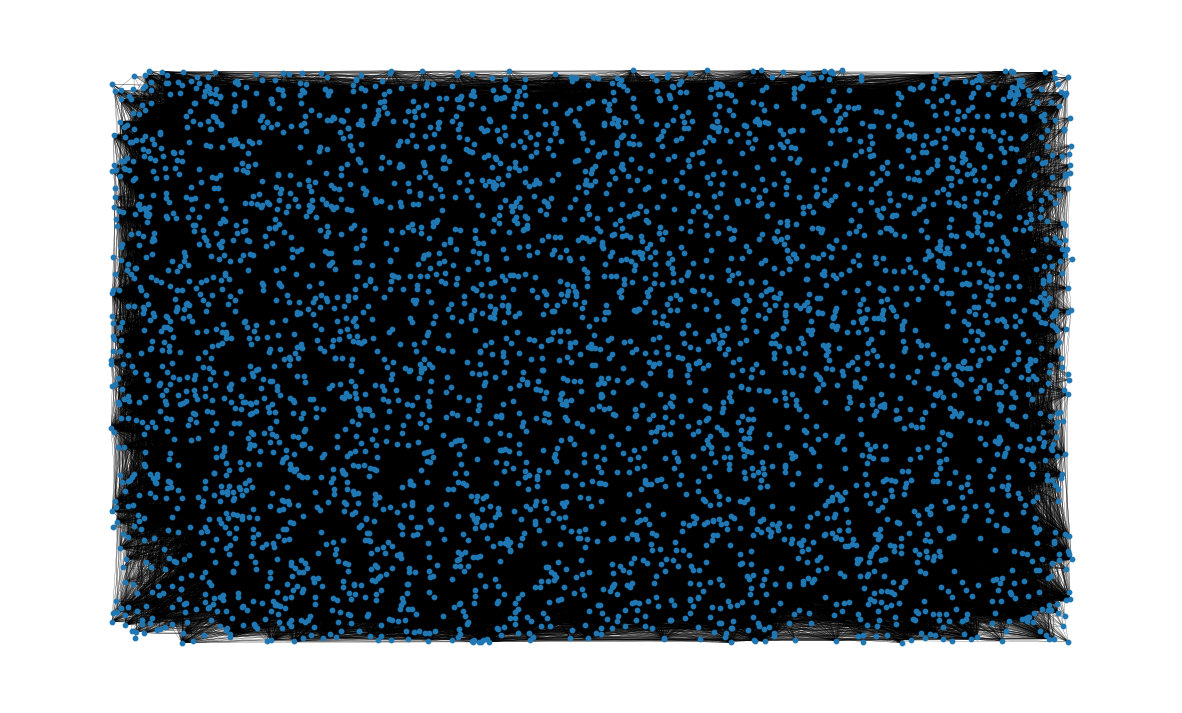

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

To make the visualization more clearly, I used different parameters to show this plot. spring_layout emphasizes the importance of some nodes with high connection between others. The following is the spring_layout plot for this graph.

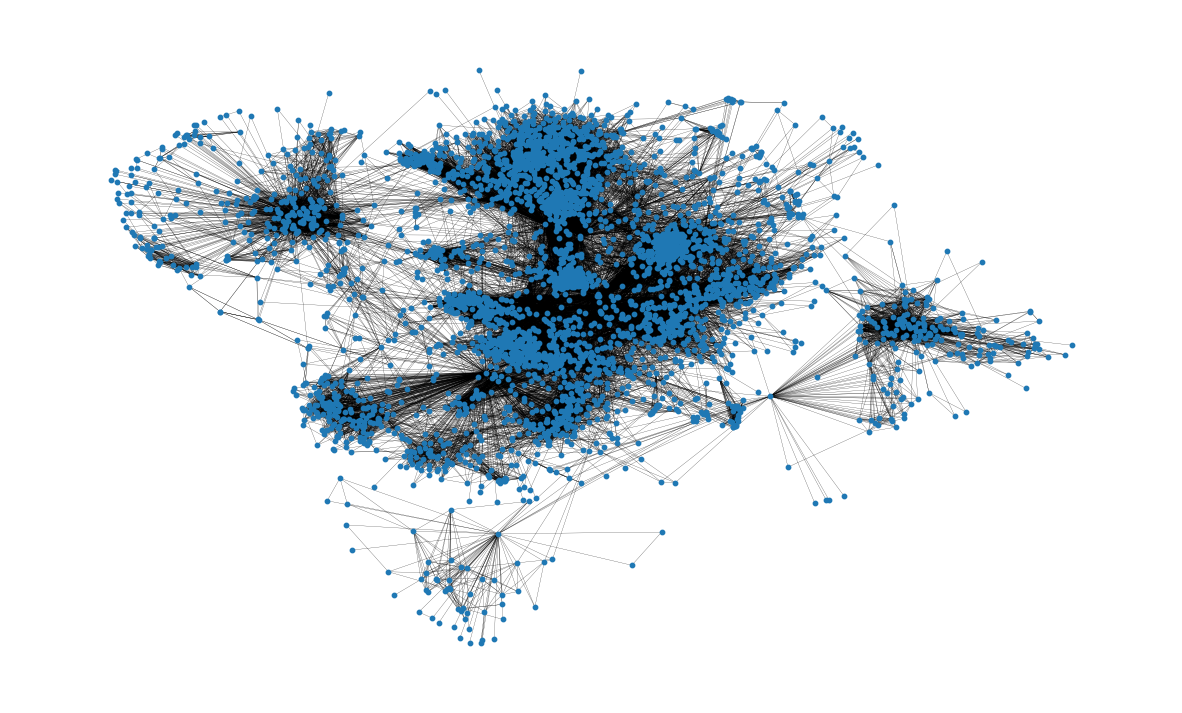

In [7]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

Before inspecting the results after applying algorithms, I plotted the original distribution of three
features: degree, clustering coefficient and closeness centrality. For each feature, there is a scatter
plot and a histogram plot

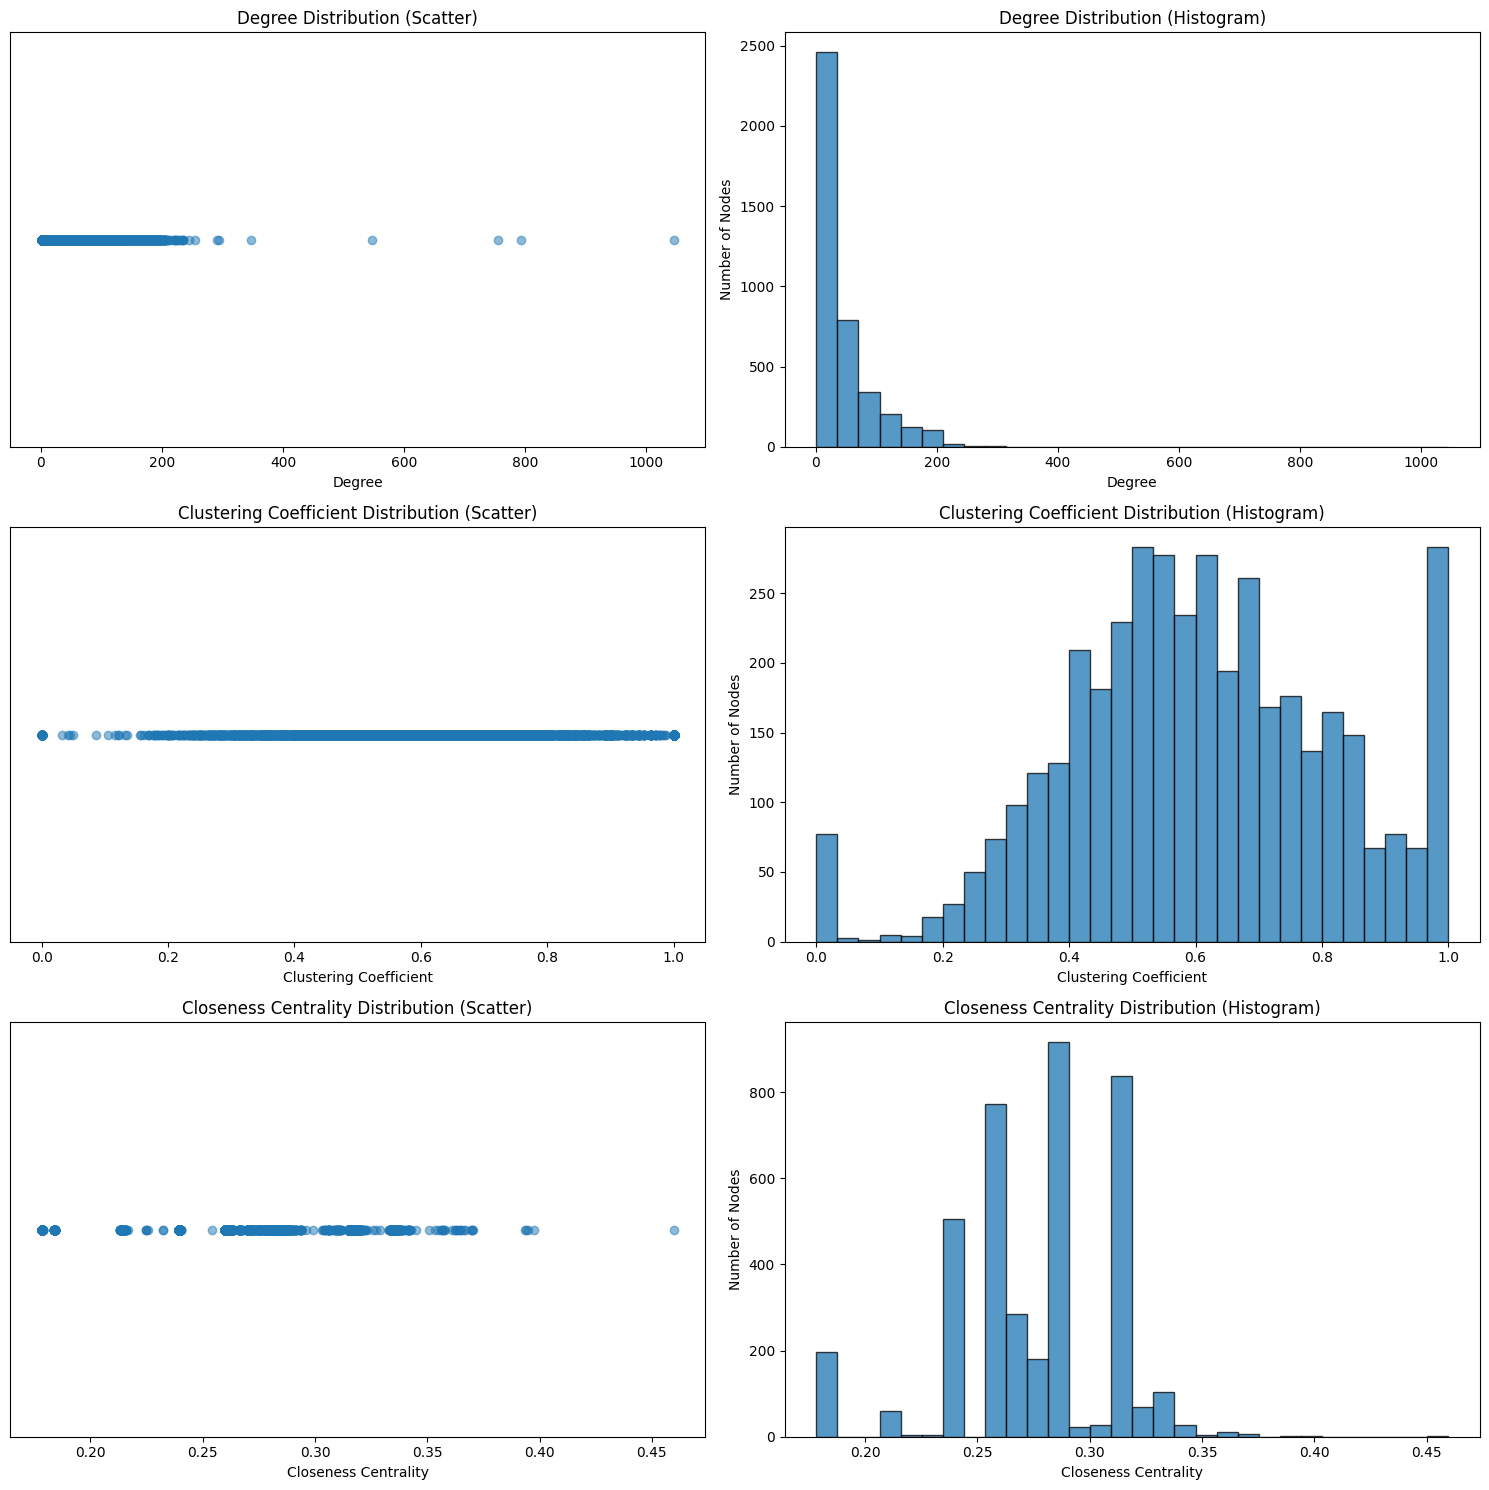

In [9]:
# Create a plot with 3 subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Feature names
feature_names = ['Degree', 'Clustering Coefficient', 'Closeness Centrality']

for i in range(features.shape[1]):
    # subplot 1: scatter plot
    axs[i, 0].scatter(features[:, i], np.zeros(features[:, i].shape), alpha=0.5)
    axs[i, 0].set_title(f'{feature_names[i]} Distribution (Scatter)')
    axs[i, 0].set_xlabel(feature_names[i])
    axs[i, 0].set_yticks([])

    # subplot 2: histogram
    axs[i, 1].hist(features[:, i], bins=30, alpha=0.75, edgecolor='black')
    axs[i, 1].set_title(f'{feature_names[i]} Distribution (Histogram)')
    axs[i, 1].set_xlabel(feature_names[i])
    axs[i, 1].set_ylabel('Number of Nodes')

# Adjust the layout
plt.tight_layout()
plt.show()

## Methods and Algorithms 

### Principal Component Analysis(PCA)

Three features are too time-consuming. So I applied PCA on three features data, turning it into 2 components.

In [ ]:
# set number of components to 2 and apply PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

### K-means over data with and without PCA

To see the effect of PCA, I compared the prediction values using K-means method based on data with and without PCA. Here I chose 4 as the number of clusters. The criteria used are Silhouette Score and Calinski-Harabasz Score.

Then, I plotted the K-means clustering results for each feature pairs in three features without PCA and two PCA components.

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files (x86)\Microsoft Visual Studio\Sh

Silhouette Score (No PCA): 0.6548191163334156
Silhouette Score (With PCA): 0.6548276144984516
Calinski-Harabasz Score (No PCA): 10506.340823397693
Calinski-Harabasz Score (With PCA): 10506.37945645124


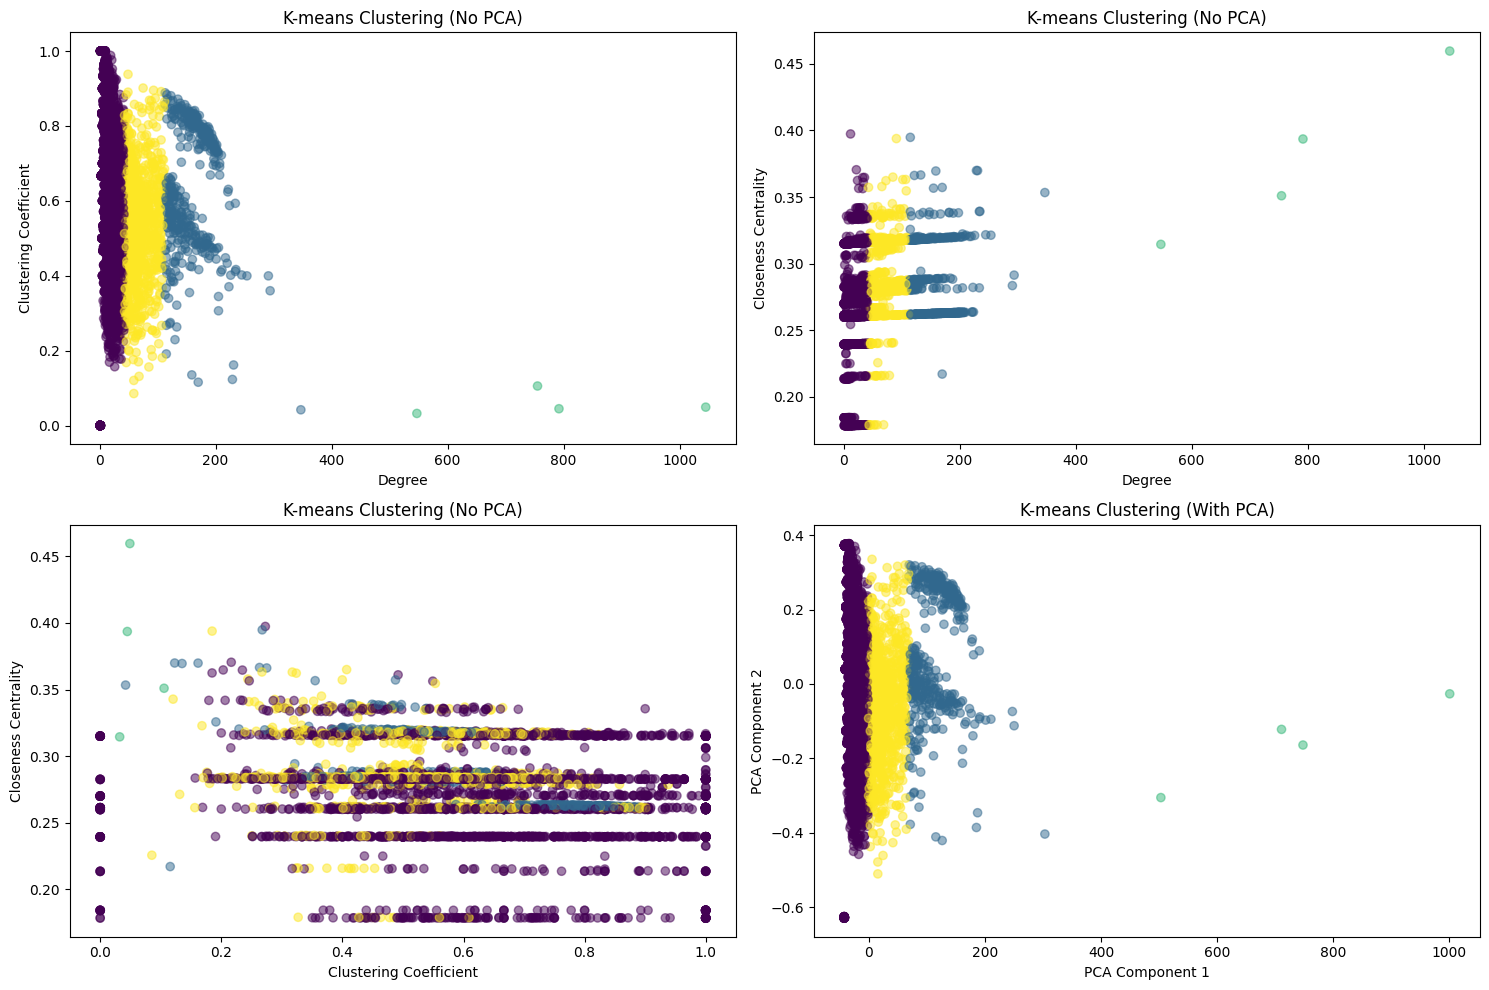

In [10]:
# K-means clustering without PCA, set number of clusters to 4
kmeans_no_pca = KMeans(n_clusters=4, random_state=42)
clusters_no_pca = kmeans_no_pca.fit_predict(features)

# K-means clustering with PCA, set number of clusters to 4
kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(features_pca)

# Calculate Silhouette Score and Calinski-Harabasz Score
silhouette_no_pca = silhouette_score(features, clusters_no_pca)
silhouette_pca = silhouette_score(features_pca, clusters_pca)

calinski_harabasz_no_pca = calinski_harabasz_score(features, clusters_no_pca)
calinski_harabasz_pca = calinski_harabasz_score(features_pca, clusters_pca)
print(f'Silhouette Score (No PCA): {silhouette_no_pca}')
print(f'Silhouette Score (With PCA): {silhouette_pca}')
print(f'Calinski-Harabasz Score (No PCA): {calinski_harabasz_no_pca}')
print(f'Calinski-Harabasz Score (With PCA): {calinski_harabasz_pca}')

# visualize the clustering results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# K-means clustering result for Degree vs Clustering Coefficient
axs[0, 0].scatter(features[:, 0], features[:, 1], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[0, 0].set_title("K-means Clustering (No PCA)")
axs[0, 0].set_xlabel("Degree")
axs[0, 0].set_ylabel("Clustering Coefficient")

# K-means clustering result for Degree vs Closeness Centrality
axs[0, 1].scatter(features[:, 0], features[:, 2], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[0, 1].set_title("K-means Clustering (No PCA)")
axs[0, 1].set_xlabel("Degree")
axs[0, 1].set_ylabel("Closeness Centrality")

# K-means clustering result for Clustering Coefficient vs Closeness Centrality
axs[1, 0].scatter(features[:, 1], features[:, 2], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[1, 0].set_title("K-means Clustering (No PCA)")
axs[1, 0].set_xlabel("Clustering Coefficient")
axs[1, 0].set_ylabel("Closeness Centrality")

# K-means clustering result for PCA component 1 vs PCA component 2
axs[1, 1].scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_pca, alpha=0.5, cmap='viridis')
axs[1, 1].set_title("K-means Clustering (With PCA)")
axs[1, 1].set_xlabel("PCA Component 1")
axs[1, 1].set_ylabel("PCA Component 2")

# Adjust the layout
plt.tight_layout()
plt.show()

We can find that Silhouette Score and Calinski-Harabasz Score both have improved a little after PCA, compared with No PCA. 
In addition, we can find that degree and clustering coefficients are actually working well in classifying the original points into K-means. But the closeness centrality can not serve as a good classifier.

### PageRank

Use PageRank on the graph G. Sort and print the PageRanks of each node. And visualize the distribution of PageRanks for each node using histogram

PageRank Scores:
3437:  0.0076145868447496;
107:  0.006936420955866117;
1684:  0.006367162138306824;
0:  0.006289602618466542;
1912:  0.003876971600884498;
348:  0.002348096972780577;
686:  0.002219359259800019;
3980:  0.0021703235790099928;
414:  0.001800299047070226;
698:  0.0013171153138368812;
483:  0.0012974283300616095;
3830:  0.0011844348977671697;
376:  0.0009014073664792465;
2047:  0.0008410291545974014;
56:  0.0008039024292749443;
25:  0.0008004126605197681;
828:  0.0007886905420662137;
322:  0.0007867992190291398;
475:  0.0007853586142469625;
428:  0.0007800171933479687;
67:  0.0007724556453836683;
3596:  0.0007657185486816221;
2313:  0.0007541077515661331;
713:  0.0007493481050218993;
271:  0.0007457889296014826;
563:  0.0007402839803830181;
917:  0.0007331559412352087;
119:  0.0007319072593209059;
3545:  0.0007271573982528108;
3938:  0.000726601468756114;
277:  0.0007191102550992674;
1888:  0.0007117172673725062;
1800:  0.0006984646532952213;
3604:  0.0006983538389218126;


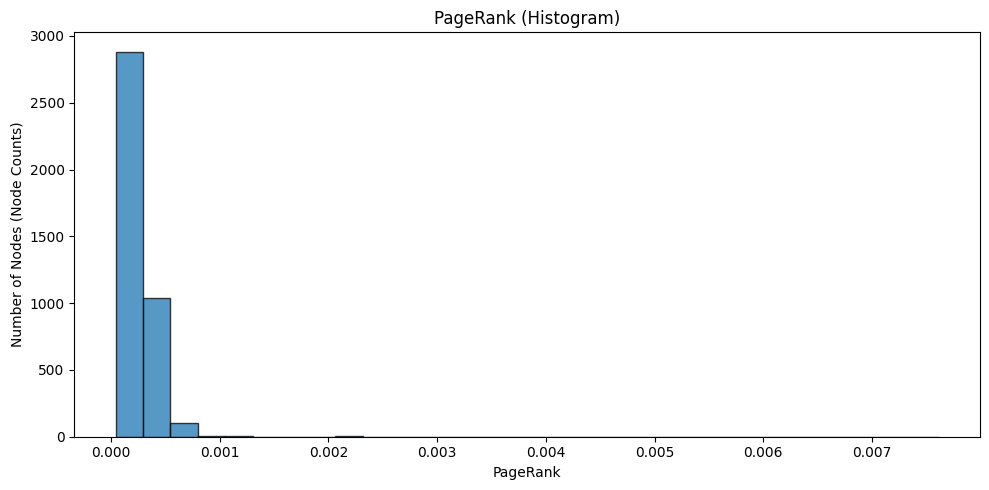

In [11]:
# Compute PageRank scores and sort them in descending order
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("PageRank Scores:")
for node, score in sorted_pagerank:
    print(f"{node}:  {score};")
    
# Create a DataFrame from the PageRank dictionary
pagerank_df = pd.DataFrame.from_dict(pagerank, orient='index', columns=['pagerank'])
pagerank_df = pagerank_df.reset_index().rename(columns={'index': 'node'})

# visualize the PageRank scores using a histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.hist(pagerank_df['pagerank'], bins=30, alpha=0.75, edgecolor='black')
axs.set_title('PageRank (Histogram)')
axs.set_xlabel('PageRank')
axs.set_ylabel('Number of Nodes (Node Counts)')

# Adjust the layout
plt.tight_layout()
plt.show()


To look into how the PageRanks match with the K-means clustering, I set high and low thresholds for PageRanks. Then, labeled those nodes having high and low PageRanks with red and blue color on the K-means clustering distribution plot.

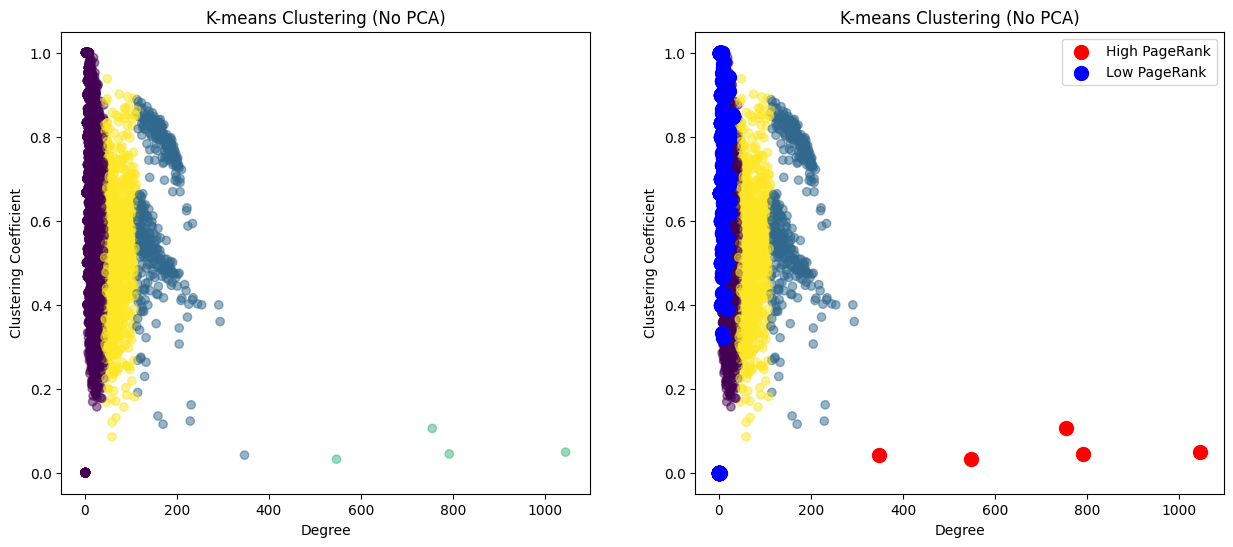

In [12]:
# set high and low thresholds for PageRank scores
threshold_high = 3e-3
high_pagerank_nodes = [node for node, score in pagerank.items() if score >= threshold_high]
high_pagerank_indices = [list(G.nodes).index(node) for node in high_pagerank_nodes]  # 获取索引
threshold_low = 1e-4
low_pagerank_nodes = [node for node, score in pagerank.items() if score <= threshold_low]
low_pagerank_indices = [list(G.nodes).index(node) for node in low_pagerank_nodes]  # 获取索引

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].scatter(features[:, 0], features[:, 1], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[0].set_title("K-means Clustering (No PCA)")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Clustering Coefficient")
axs[1].scatter(features[:, 0], features[:, 1], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[1].set_title("K-means Clustering (No PCA)")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Clustering Coefficient")

# label high and low PageRank nodes on the scatter plot
axs[1].scatter(features[high_pagerank_indices, 0], features[high_pagerank_indices, 1], 
            color='red', label='High PageRank', s=100)  # red color for high PageRank nodes
axs[1].scatter(features[low_pagerank_indices, 0], features[low_pagerank_indices, 1], 
            color='blue', label='Low PageRank', s=100)  # blue color for low PageRank nodes
# Add legend
axs[1].legend()
plt.show()

### Louvain Method

Use Louvain Method on the graph G. Then, compute the modularity of the partition of Louvain Communities. 

Visualize the distribution of Louvain Communities and count the number of nodes in each Louvain Community.

Louvain Modularity: 0.8349499420284703


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5740\2053364939.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(louvain_clusters['louvain_cluster'], louvain_clusters['node'], alpha=0.5, cmap='plasma')


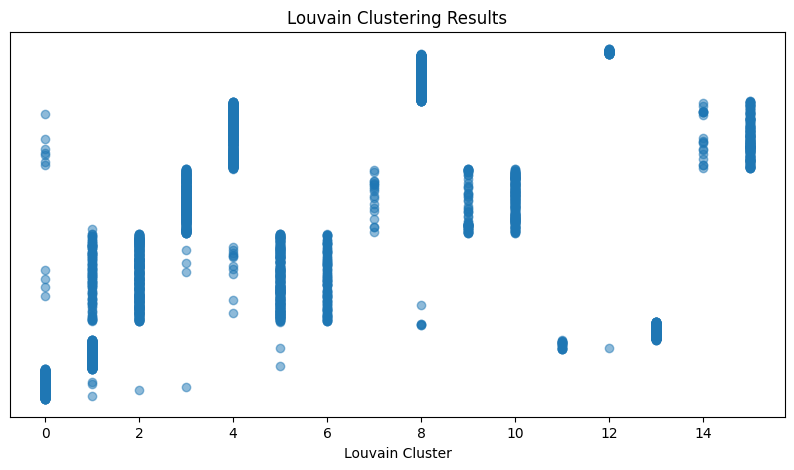

Louvain Clustering Node Counts:
louvain_cluster
8     548
4     535
2     432
1     430
3     423
0     354
5     325
10    237
15    226
13    206
6     127
9      73
12     60
11     25
14     19
7      19
Name: count, dtype: int64


In [13]:
# Use Louvain method to partition the graph G into communities
partition = community_louvain.best_partition(G)
# calculate the modularity of the partition
modularity = community_louvain.modularity(partition, G)
print(f"Louvain Modularity: {modularity}")

# Create a DataFrame from the partition dictionary
louvain_clusters = pd.Series(partition).reset_index().rename(columns={'index': 'node', 0: 'louvain_cluster'})

# visualize the distribution of Louvain Communities results
plt.figure(figsize=(10, 5))
plt.scatter(louvain_clusters['louvain_cluster'], louvain_clusters['node'], alpha=0.5, cmap='plasma')
plt.title("Louvain Clustering Results")
plt.xlabel("Louvain Cluster")
plt.yticks([])
plt.show()

# Calculate the number of nodes in each Louvain Community and list them
louvain_cluster_counts = louvain_clusters['louvain_cluster'].value_counts()
print("Louvain Clustering Node Counts:")
print(louvain_cluster_counts)

Label the nodes in different Louvain Communities, compared with K-means method plot on Degree and Clustering Coefficient before.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5740\2131060566.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_clusters))


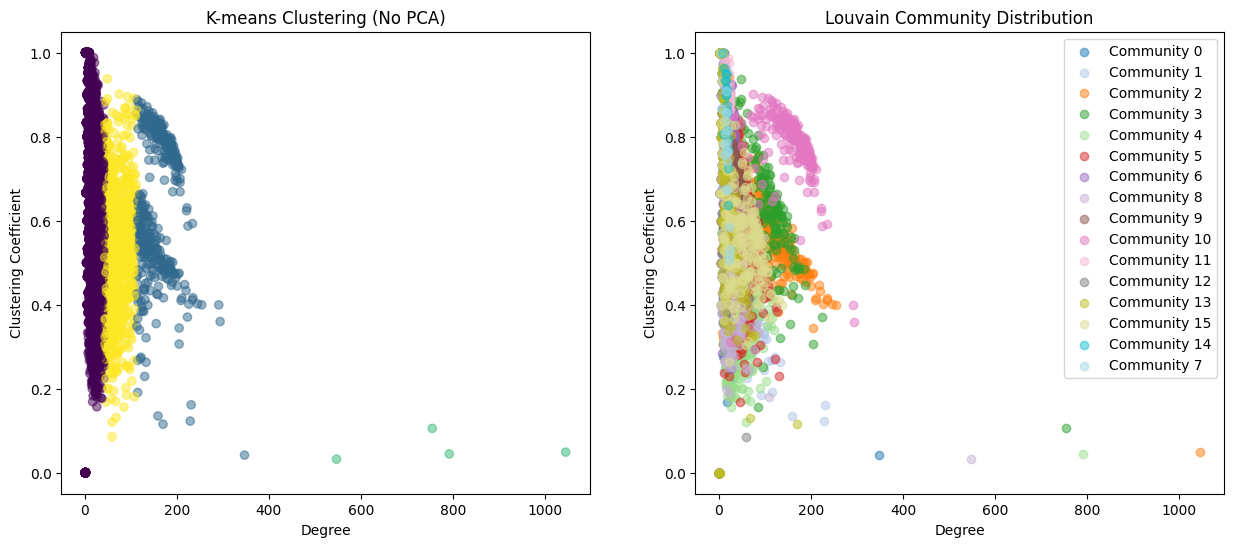

In [14]:
# visualize the distribution of Louvain Communities results
unique_clusters = louvain_clusters['louvain_cluster'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_clusters))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].scatter(features[:, 0], features[:, 1], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[0].set_title("K-means Clustering (No PCA)")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Clustering Coefficient")
for i, cluster in enumerate(unique_clusters):
    cluster_nodes = louvain_clusters[louvain_clusters['louvain_cluster'] == cluster]['node']
    cluster_indices = [list(G.nodes).index(node) for node in cluster_nodes]
    axs[1].scatter(features[cluster_indices, 0], features[cluster_indices, 1],
                   color=colors(i), label=f'Community {cluster}', alpha=0.5)

axs[1].set_title("Louvain Community Distribution")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Clustering Coefficient")

# add legend
axs[1].legend()
plt.show()

Similar to the analysis in PageRank section, choose the Louvain Community with the most number of nodes (here this community is 8) in the community and label it on the plot to compare with K-means clustering. 

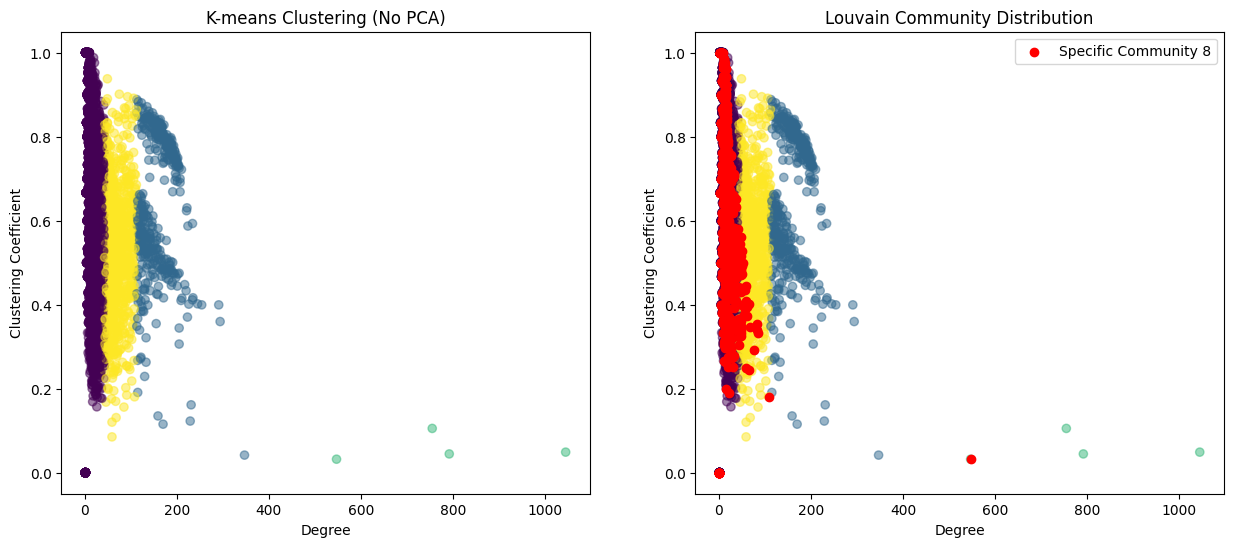

In [19]:
# choose the community with the highest number of nodes
specific_clusters = [8]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(features[:, 0], features[:, 1], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[0].set_title("K-means Clustering (No PCA)")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Clustering Coefficient")

colors = ['red', 'blue', 'green', 'purple', 'orange']
axs[1].scatter(features[:, 0], features[:, 1], c=clusters_no_pca, alpha=0.5, cmap='viridis')
axs[1].set_title("K-means Clustering (No PCA)")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Clustering Coefficient")

# label this specific community on the scatter plot
for i, cluster in enumerate(specific_clusters):
    if cluster in np.unique(louvain_clusters['louvain_cluster']):
        cluster_nodes = louvain_clusters[louvain_clusters['louvain_cluster'] == cluster]['node']
        cluster_indices = [list(G.nodes).index(node) for node in cluster_nodes]
        color = colors[i % len(colors)]  # use different colors for different communities
        axs[1].scatter(features[cluster_indices, 0], features[cluster_indices, 1],
                       color=color, label=f'Specific Community {cluster}')


axs[1].set_title("Louvain Community Distribution")
axs[1].set_xlabel("Degree")
axs[1].set_ylabel("Clustering Coefficient")

# add legend
axs[1].legend()
plt.show()

It's easy to find that this community 8 with the most nodes has a similar classification effect with one of the K-means clusters. 

To quantify the difference between K-means clusters and Louvain Communities, I used the Jaccard similarities between K-means clusters and Louvain communities.

In [16]:
from sklearn.metrics import jaccard_score

kmeans_clusters = {}
for idx, label in enumerate(clusters_no_pca):
    kmeans_clusters.setdefault(label, []).append(idx)

louvain_communities = {}
for _, row in louvain_clusters.iterrows():
    node = row['node']
    community = row['louvain_cluster']
    louvain_communities.setdefault(community, []).append(node)

# calculate Jaccard similarity between K-means clusters and Louvain communities
for k_cluster in kmeans_clusters:
    for l_community in louvain_communities:
        intersection = set(kmeans_clusters[k_cluster]) & set(louvain_communities[l_community])
        union = set(kmeans_clusters[k_cluster]) | set(louvain_communities[l_community])
        if union:
            jaccard_index = len(intersection) / len(union)
            print(f"K-Means Cluster {k_cluster} and Louvain Community {l_community} Jaccard Index: {jaccard_index}")

K-Means Cluster 1 and Louvain Community 0 Jaccard Index: 0.005333333333333333
K-Means Cluster 1 and Louvain Community 1 Jaccard Index: 0.06683804627249357
K-Means Cluster 1 and Louvain Community 2 Jaccard Index: 0.06257982120051085
K-Means Cluster 1 and Louvain Community 3 Jaccard Index: 0.026184538653366583
K-Means Cluster 1 and Louvain Community 4 Jaccard Index: 0.15147783251231528
K-Means Cluster 1 and Louvain Community 5 Jaccard Index: 0.06304985337243402
K-Means Cluster 1 and Louvain Community 6 Jaccard Index: 0.02131782945736434
K-Means Cluster 1 and Louvain Community 8 Jaccard Index: 0.01935483870967742
K-Means Cluster 1 and Louvain Community 9 Jaccard Index: 0.0
K-Means Cluster 1 and Louvain Community 10 Jaccard Index: 0.011111111111111112
K-Means Cluster 1 and Louvain Community 11 Jaccard Index: 0.011904761904761904
K-Means Cluster 1 and Louvain Community 12 Jaccard Index: 0.0
K-Means Cluster 1 and Louvain Community 13 Jaccard Index: 0.041237113402061855
K-Means Cluster 1 and 

Furthermore, I counted the number of Louvain communities in each K-means cluster and the number of K-means clusters in each Louvain community.

In [22]:
from collections import defaultdict

louvain_clusters['kmeans_cluster'] = clusters_no_pca

# compute the number of Louvain communities in each K-Means cluster
louvain_to_kmeans = defaultdict(set)
for _, row in louvain_clusters.iterrows():
    louvain_to_kmeans[row['louvain_cluster']].add(row['kmeans_cluster'])

# compute the number of K-Means clusters in each Louvain community
kmeans_to_louvain = defaultdict(set)
for _, row in louvain_clusters.iterrows():
    kmeans_to_louvain[row['kmeans_cluster']].add(row['louvain_cluster'])

# print every Louvain community contains how many K-Means clusters
print("Every Louvain community contains how many K-Means clusters:")
for louvain_cluster, kmeans_clusters in louvain_to_kmeans.items():
    print(f"Louvain Community {louvain_cluster} contains {len(kmeans_clusters)} K-Means clusters")

# print every K-Means cluster contains how many Louvain communities
print("\nEvery K-Means cluster contains how many Louvain communities:")
for kmeans_cluster, louvain_communities in kmeans_to_louvain.items():
    print(f"K-Means cluster {kmeans_cluster} contains {len(louvain_communities)} Louvain communities")

Every Louvain community contains how many K-Means clusters:
Louvain Community 0 contains 3 K-Means clusters
Louvain Community 1 contains 3 K-Means clusters
Louvain Community 2 contains 4 K-Means clusters
Louvain Community 3 contains 4 K-Means clusters
Louvain Community 4 contains 4 K-Means clusters
Louvain Community 5 contains 3 K-Means clusters
Louvain Community 6 contains 2 K-Means clusters
Louvain Community 8 contains 3 K-Means clusters
Louvain Community 9 contains 2 K-Means clusters
Louvain Community 10 contains 3 K-Means clusters
Louvain Community 11 contains 1 K-Means clusters
Louvain Community 12 contains 2 K-Means clusters
Louvain Community 13 contains 3 K-Means clusters
Louvain Community 15 contains 3 K-Means clusters
Louvain Community 14 contains 1 K-Means clusters
Louvain Community 7 contains 1 K-Means clusters

Every K-Means cluster contains how many Louvain communities:
K-Means cluster 1 contains 9 Louvain communities
K-Means cluster 0 contains 16 Louvain communities
K-Mea

Finally, I combined PageRank, K-means and Louvain Method together: labeling nodes with high and low PageRanks in the distribution plot of Louvain communities and K-means clusters.


High PageRank Nodes Information:
      node  louvain_cluster  kmeans_cluster
0        0                0               1
107    107                2               2
351   1684                4               2
352   1912                3               2
1821  3437                8               2


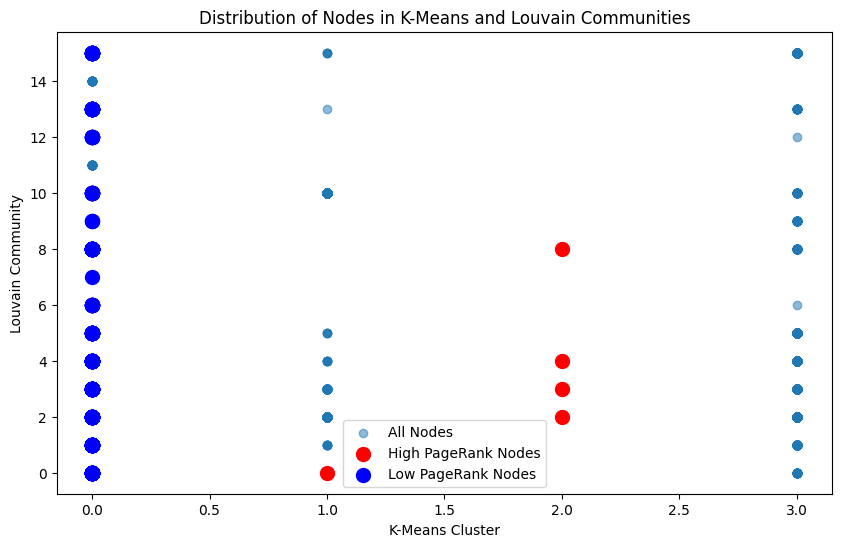

In [18]:
overlap_counts = pd.DataFrame({
    'node': louvain_clusters['node'],
    'louvain_cluster': louvain_clusters['louvain_cluster'],
    'kmeans_cluster': clusters_no_pca
})
# select the Louvain community and K-means cluster information of the nodes with high and low PageRank scores
high_pagerank_info = overlap_counts[overlap_counts['node'].isin(high_pagerank_nodes)]
low_pagerank_info = overlap_counts[overlap_counts['node'].isin(low_pagerank_nodes)]
print("\nHigh PageRank Nodes Information:")
print(high_pagerank_info)

# visualize the distribution of nodes with high PageRank and low PageRank in K-Means clusters and Louvain Communities
plt.figure(figsize=(10, 6))
plt.scatter(overlap_counts['kmeans_cluster'], overlap_counts['louvain_cluster'], alpha=0.5, label='All Nodes')
plt.scatter(high_pagerank_info['kmeans_cluster'], high_pagerank_info['louvain_cluster'], color='red', label='High PageRank Nodes', s=100)
plt.scatter(low_pagerank_info['kmeans_cluster'], low_pagerank_info['louvain_cluster'], color='blue', label='Low PageRank Nodes', s=100)
plt.title("Distribution of Nodes in K-Means and Louvain Communities")
plt.xlabel("K-Means Cluster")
plt.ylabel("Louvain Community")
plt.legend()
plt.show()

It's easy to find that high PageRank nodes are mainly centered in K-means cluster 2, while low PageRank nodes are mainly centered in cluster 0. And there is no clear distribution pattern about these nodes in Louvain communities.